# 数值仿真：失业率的自稳定机制

### （1）当自然失业率给定

When Natural Rate of Unemployment is given to be 0.3


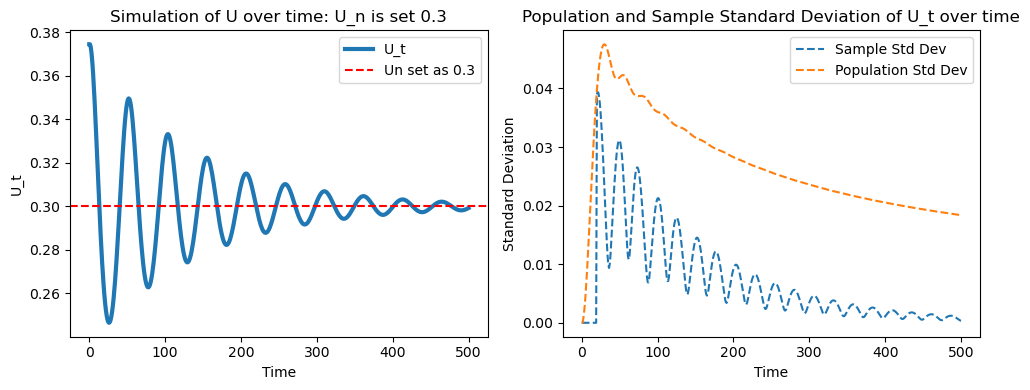

In [1]:
print("When Natural Rate of Unemployment is given to be 0.3")

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = 0.05
num_steps = 500
window_size = 20
seed_value = 42
np.random.seed(seed_value)

# Initialize arrays to store U_t, population std, and sample std values
U_values = np.zeros(num_steps + 1)
population_std_values = np.zeros(num_steps + 1)
sample_std_values = np.zeros(num_steps + 1)

U_values[0] = np.random.uniform(0, 1)  # Initial condition, randomly chosen between 0 and 1
U_values[1] = U_values[0]
population_std_values[0] = 0  # Initial value of population standard deviation
sample_std_values[0] = 0  # Initial value of sample standard deviation

# Iterate to calculate U_t, population std, and sample std
for t in range(2, num_steps + 1):
    U_values[t] = U_values[t-1]**2 / ((1 + alpha * U_values[t-1]) * U_values[t-2]) + 0.3 * alpha * U_values[t-1] / (1 + alpha * U_values[t-1])

    # Calculate population standard deviation
    population_std_values[t] = np.std(U_values[:t+1])

    # Calculate sample standard deviation using sliding window
    if t >= window_size:
        sample_std_values[t] = np.std(U_values[t-window_size+1:t+1])

# Plotting both figures side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting U_t
axes[0].plot(np.arange(num_steps + 1), U_values, linewidth=3, label='U_t')
axes[0].axhline(y=0.3, color='r', linestyle='--', label='Un set as 0.3')  # Add a horizontal dashed line at y=0.3
axes[0].set_title("Simulation of U over time: U_n is set 0.3")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("U_t")
axes[0].legend()

# Plotting standard deviations
axes[1].plot(np.arange(num_steps + 1), sample_std_values, label='Sample Std Dev', linestyle='dashed')
axes[1].plot(np.arange(num_steps + 1), population_std_values, label='Population Std Dev', linestyle='dashed')
axes[1].set_title("Population and Sample Standard Deviation of U_t over time")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Standard Deviation")
axes[1].legend()

plt.tight_layout()
plt.show()


### （2）当自然失业率存在“失业回滞”

When Natural Rate of Unemployment is Average of Past Observations Plus a stochastic shock


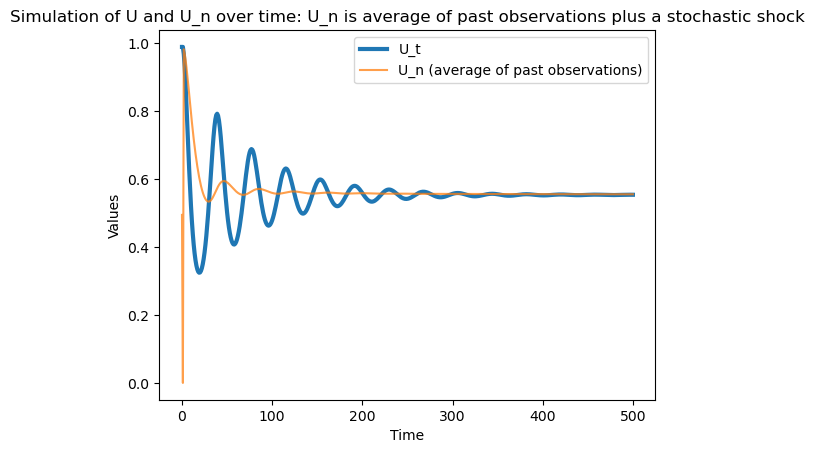

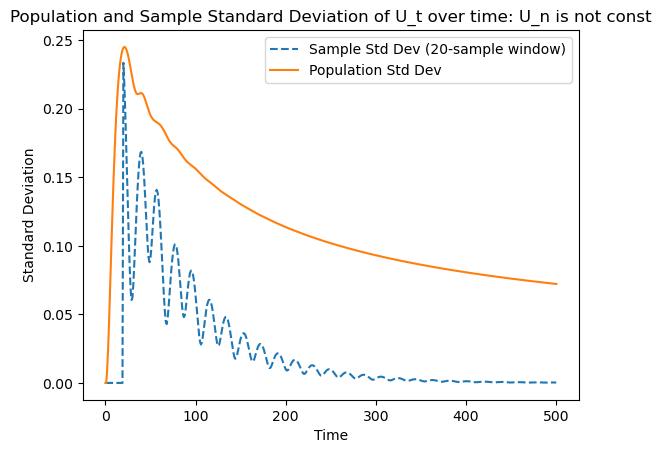

In [2]:
print("When Natural Rate of Unemployment is Average of Past Observations Plus a stochastic shock")

import numpy as np
import matplotlib.pyplot as plt
seed_value = 45
np.random.seed(seed_value)
# 定义参数
alpha = 0.05
num_steps = 500
window_size = 20 


# 初始化数组用于存储 A_t 的值
U_values = np.zeros(num_steps + 1)
Un_values = np.zeros(num_steps + 1)
population_std_values = np.zeros(num_steps + 1)
sample_std_values = np.zeros(num_steps + 1)

U_values[0] = np.random.uniform(0, 1)  # 初始条件，随机选择在 0 到 1 之间
Un_values[0] = np.mean(U_values[:2])  # Initial value of Un
population_std_values[0] = 0  # Initial value of population standard deviation
sample_std_values[0] = 0  # Initial value of sample standard deviation

U_values[1] = U_values[0]
Un = np.mean(U_values)+np.random.uniform(0, 1)


# 迭代计算 A_t 的值
for t in range(2, num_steps + 1):
    U_values[t] = U_values[t-1]**2 / ((1 + alpha * U_values[t-1])*U_values[t-2])+Un * alpha *U_values[t-1]/(1 + alpha * U_values[t-1])
    Un_values[t] = np.mean(U_values[:t+1])
    
     # Calculate population standard deviation
    population_std_values[t] = np.std(U_values[:t+1])

    # Calculate sample standard deviation using sliding window
    if t >= window_size:
        sample_std_values[t] = np.std(U_values[t-window_size+1:t+1])

# 画图
time_points = np.arange(num_steps + 1)
plt.plot(time_points, U_values, label='U_t',linewidth=3)
plt.plot(time_points, Un_values, label='U_n (average of past observations)',alpha=0.75)
plt.title("Simulation of U and U_n over time: U_n is average of past observations plus a stochastic shock")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

plt.plot(time_points, sample_std_values, label='Sample Std Dev (20-sample window)', linestyle='dashed')
plt.plot(time_points, population_std_values, label='Population Std Dev')
plt.title("Population and Sample Standard Deviation of U_t over time: U_n is not const")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

### （3）当经济运行中出现外生冲击

When Natural Rate of Unemployment is given to be 0.3


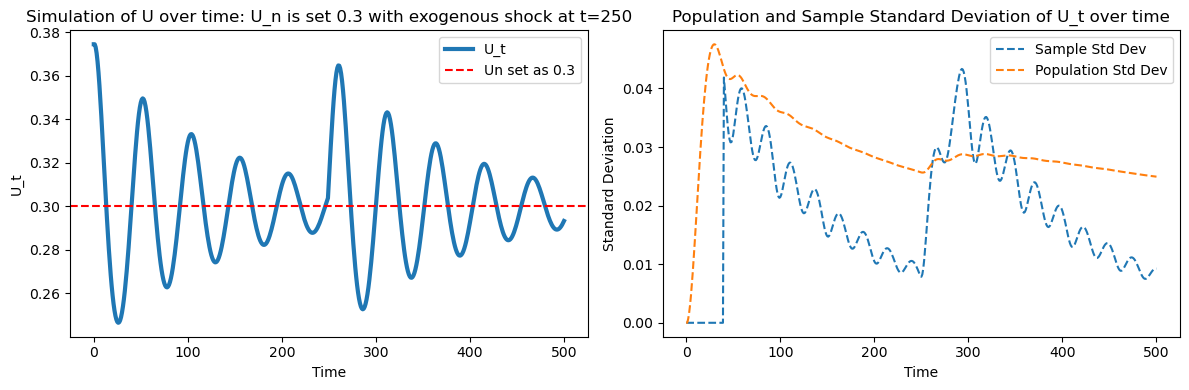

In [3]:
print("When Natural Rate of Unemployment is given to be 0.3")

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = 0.05
num_steps = 500
window_size = 40
shock_period = 250  # Period when the exogenous shock occurs
U0 = 0.312  # Ushock

seed_value = 42
np.random.seed(seed_value)

# Initialize arrays to store U_t, population std, and sample std values
U_values = np.zeros(num_steps + 1)
population_std_values = np.zeros(num_steps + 1)
sample_std_values = np.zeros(num_steps + 1)

U_values[0] = np.random.uniform(0, 1)  # Initial condition, randomly chosen between 0 and 1
U_values[1] = U_values[0]
population_std_values[0] = 0  # Initial value of population standard deviation
sample_std_values[0] = 0  # Initial value of sample standard deviation

# Iterate to calculate U_t, population std, and sample std
for t in range(2, num_steps + 1):
    # Apply exogenous shock at time t = shock_period
    if t == shock_period:
        U_values[t] = U0
    else:
        U_values[t] = U_values[t-1]**2 / ((1 + alpha * U_values[t-1]) * U_values[t-2]) + 0.3 * alpha * U_values[t-1] / (1 + alpha * U_values[t-1])

    # Calculate population standard deviation
    population_std_values[t] = np.std(U_values[:t+1])

    # Calculate sample standard deviation using sliding window
    if t >= window_size:
        sample_std_values[t] = np.std(U_values[t-window_size+1:t+1])

# Plotting both figures in a single plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting U_t
axes[0].plot(np.arange(num_steps + 1), U_values, linewidth=3, label='U_t')
axes[0].axhline(y=0.3, color='r', linestyle='--', label='Un set as 0.3')  # Add a horizontal dashed line at y=0.3
axes[0].set_title("Simulation of U over time: U_n is set 0.3 with exogenous shock at t=250")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("U_t")
axes[0].legend()

# Plotting standard deviations
axes[1].plot(np.arange(num_steps + 1), sample_std_values, label='Sample Std Dev', linestyle='dashed')
axes[1].plot(np.arange(num_steps + 1), population_std_values, label='Population Std Dev', linestyle='dashed')
axes[1].set_title("Population and Sample Standard Deviation of U_t over time")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Standard Deviation")
axes[1].legend()

plt.tight_layout()
plt.show()


# 实证：标准差的滑动窗口验证

### （1）当滑动窗口周期设置为6个月

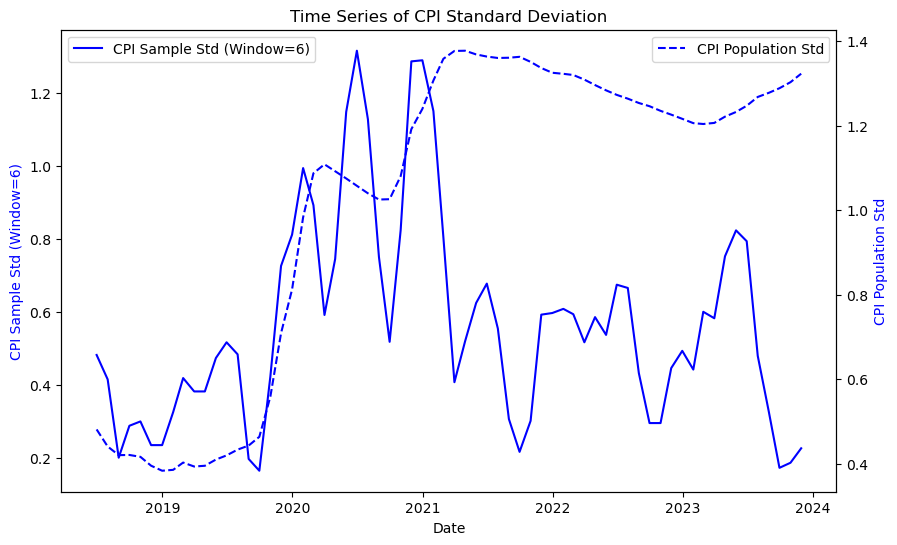

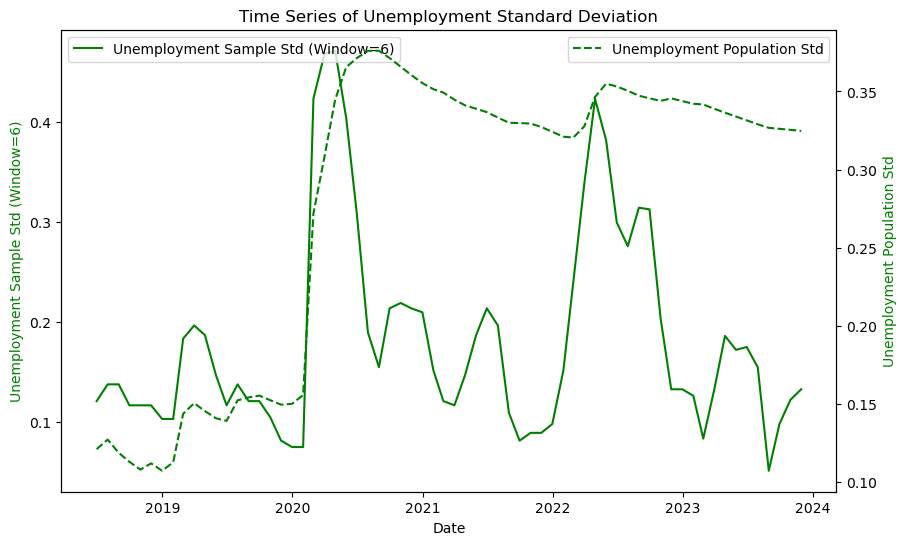

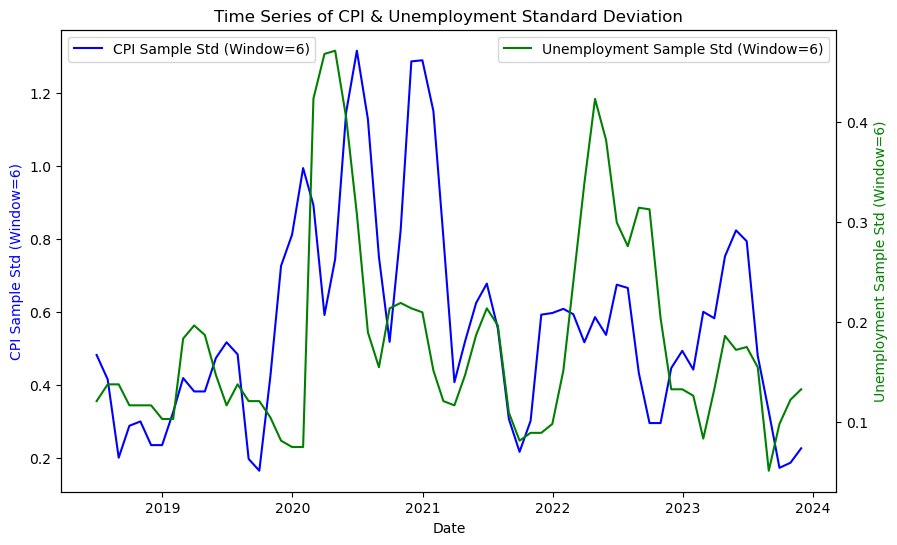

In [4]:
###实证_总体和样本滑动窗口标准差
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 计算CPI的样本和总体滑动标准差
window_size = 6
df['CPI_std_sample'] = df['CPI'].rolling(window=window_size).std()
df['CPI_std_population'] = df['CPI'].expanding().std()

# 计算失业率的样本和总体滑动标准差
df['U_std_sample'] = df['U'].rolling(window=window_size).std()
df['U_std_population'] = df['U'].expanding().std()

# 丢弃NaN值
df = df.dropna()

# 绘制CPI的样本和总体滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['CPI_std_sample'], label='CPI Sample Std (Window=6)', color='blue')
ax2.plot(df['date'], df['CPI_std_population'], label='CPI Population Std', linestyle='dashed', color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Sample Std (Window=6)', color='blue')
ax2.set_ylabel('CPI Population Std', color='blue')
plt.title('Time Series of CPI Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 绘制失业率的样本和总体滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['U_std_sample'], label='Unemployment Sample Std (Window=6)', color='green')
ax2.plot(df['date'], df['U_std_population'], label='Unemployment Population Std', linestyle='dashed', color='green')

ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Sample Std (Window=6)', color='green')
ax2.set_ylabel('Unemployment Population Std', color='green')
plt.title('Time Series of Unemployment Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#绘制CPI和失业率的样本滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['CPI_std_sample'], label='CPI Sample Std (Window=6)', color='blue')
ax2.plot(df['date'], df['U_std_sample'], label='Unemployment Sample Std (Window=6)', color='green')

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Sample Std (Window=6)', color='blue')
ax2.set_ylabel('Unemployment Sample Std (Window=6)', color='green')
plt.title('Time Series of CPI & Unemployment Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()




### （2）当滑动时间窗口设置为12个月

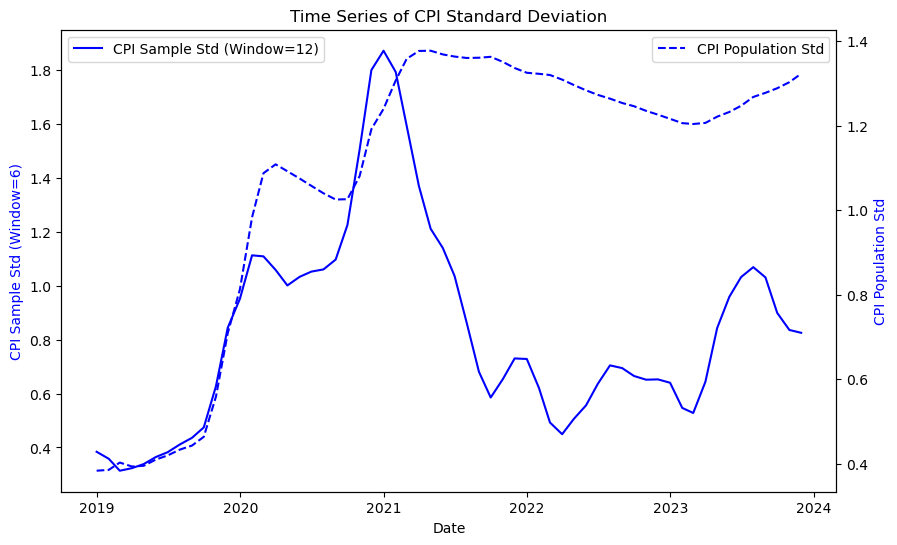

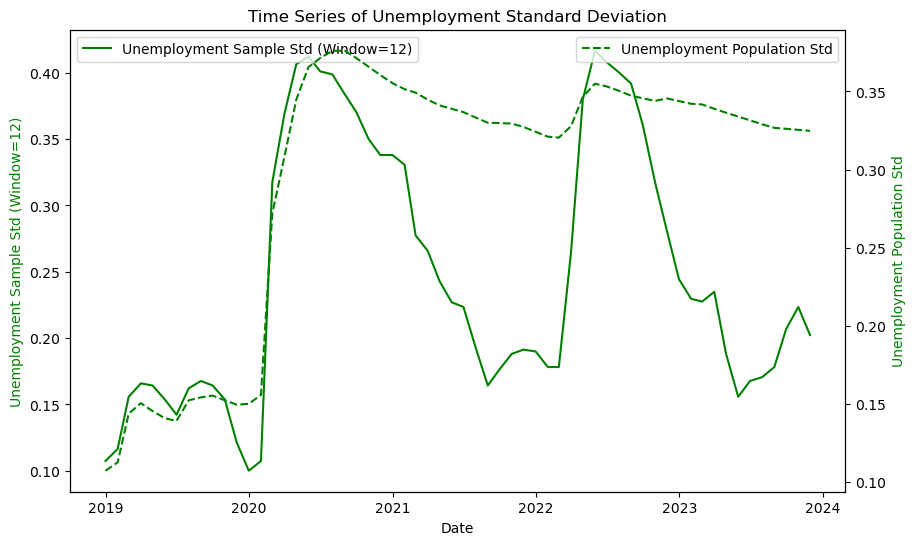

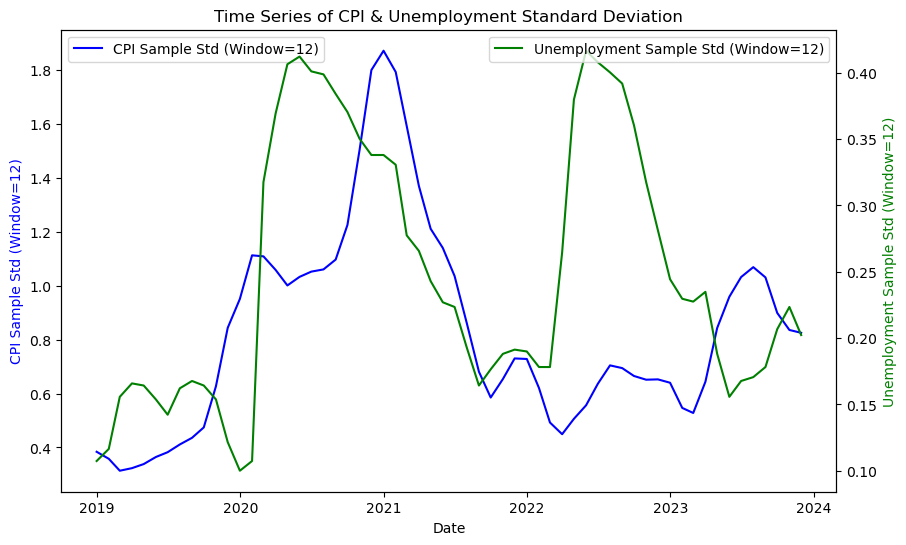

In [5]:
###实证_总体和样本滑动窗口标准差
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 计算CPI的样本和总体滑动标准差
window_size = 12
df['CPI_std_sample'] = df['CPI'].rolling(window=window_size).std()
df['CPI_std_population'] = df['CPI'].expanding().std()

# 计算失业率的样本和总体滑动标准差
df['U_std_sample'] = df['U'].rolling(window=window_size).std()
df['U_std_population'] = df['U'].expanding().std()

# 丢弃NaN值
df = df.dropna()

# 绘制CPI的样本和总体滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['CPI_std_sample'], label='CPI Sample Std (Window=12)', color='blue')
ax2.plot(df['date'], df['CPI_std_population'], label='CPI Population Std', linestyle='dashed', color='blue')

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Sample Std (Window=6)', color='blue')
ax2.set_ylabel('CPI Population Std', color='blue')
plt.title('Time Series of CPI Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# 绘制失业率的样本和总体滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['U_std_sample'], label='Unemployment Sample Std (Window=12)', color='green')
ax2.plot(df['date'], df['U_std_population'], label='Unemployment Population Std', linestyle='dashed', color='green')

ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Sample Std (Window=12)', color='green')
ax2.set_ylabel('Unemployment Population Std', color='green')
plt.title('Time Series of Unemployment Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#绘制CPI和失业率的样本滑动标准差
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(df['date'], df['CPI_std_sample'], label='CPI Sample Std (Window=12)', color='blue')
ax2.plot(df['date'], df['U_std_sample'], label='Unemployment Sample Std (Window=12)', color='green')

ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Sample Std (Window=12)', color='blue')
ax2.set_ylabel('Unemployment Sample Std (Window=12)', color='green')
plt.title('Time Series of CPI & Unemployment Standard Deviation')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()




### 统计检验：以年分组，失业率的标准差的年度组别差异是否显著呢？

In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# 读取数据
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 提取年份信息
df['Year'] = pd.to_datetime(df['date']).dt.year

# 计算失业率的样本滑动标几何
window_size = 12
df['U_std_sample'] = df['U'].rolling(window=window_size).std()

# 按年分组，计算每年的均值
grouped = df.groupby('Year')['U_std_sample'].mean()

# 统计检验相邻年份均值的差异显著性
t_test_results = []
for i in range(len(grouped) - 1):
    year_data1 = df[df['Year'] == grouped.index[i]]['U_std_sample'].values
    year_data2 = df[df['Year'] == grouped.index[i + 1]]['U_std_sample'].values
    
    t_stat, p_value = ttest_ind(year_data1, year_data2)
    t_test_results.append({'year_start': grouped.index[i],
                           'year_end': grouped.index[i + 1],
                           't_stat': t_stat,
                           'p_value': p_value})

# 输出结果
print("失业率 t 检验结果：")
for result in t_test_results:
    print(result)


失业率 t 检验结果：
{'year_start': 2018, 'year_end': 2019, 't_stat': nan, 'p_value': nan}
{'year_start': 2019, 'year_end': 2020, 't_stat': -8.221436950563001, 'p_value': 3.740681555367212e-08}
{'year_start': 2020, 'year_end': 2021, 't_stat': 4.592427711496788, 'p_value': 0.00014194533682297374}
{'year_start': 2021, 'year_end': 2022, 't_stat': -3.307175693405304, 'p_value': 0.0032070051614383564}
{'year_start': 2022, 'year_end': 2023, 't_stat': 4.329418146151152, 'p_value': 0.0002955540391454633}
